In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devanshujindal","key":"3a9059868d799a4eb7eac8f7cadda067"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls

'kaggle (1).json'   kaggle.json   sample_data


In [0]:
!kaggle datasets download -d ashishvaya/recommendation-engine

  0% 0.00/1.87M [00:00<?, ?B/s]
100% 1.87M/1.87M [00:00<00:00, 63.4MB/s]


In [0]:
ls

'kaggle (1).json'   kaggle.json   recommendation-engine.zip   sample_data/


# New Section

In [0]:
!unzip recommendation-engine.zip

Archive:  recommendation-engine.zip
  inflating: test_submissions_NeDLEvX.csv  
  inflating: problem_data.csv        
  inflating: train_submissions.csv   
  inflating: user_data.csv           
  inflating: sample_submissions_wbscxqU.csv  
  inflating: submission.csv          


In [0]:
ls

'kaggle (1).json'            sample_submissions_wbscxqU.csv
 kaggle.json                 submission.csv
 problem_data.csv            test_submissions_NeDLEvX.csv
 recommendation-engine.zip   train_submissions.csv
 sample_data/                user_data.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [0]:
problems_df = pd.read_csv('problem_data.csv')
users_df = pd.read_csv('user_data.csv')
train_df = pd.read_csv('train_submissions.csv')
test_df = pd.read_csv('test_submissions_NeDLEvX.csv')


In [0]:
print("Training data count: ",len(train_df))
print("No. of null values: ", train_df.isnull().sum())

Training data count:  155295
No. of null values:  user_id           0
problem_id        0
attempts_range    0
dtype: int64


In [0]:
print("Testing data count: ",len(test_df))
print("No. of null values: ", test_df.isnull().sum())

Testing data count:  66555
No. of null values:  ID            0
user_id       0
problem_id    0
dtype: int64


In [0]:
print("No. of problems: ",len(problems_df))
print("No. of null values: ",problems_df.isnull().sum())

No. of problems:  6544
No. of null values:  problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64


In [0]:
print("No. of users: ",len(users_df))
print("No. of null values: ",users_df.isnull().sum())

No. of users:  3571
No. of null values:  user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64


In [0]:
print("PROBLEMS_DATA.CSV\n",problems_df.head(),"\n")
print("USERS_DATA.CSV\n",users_df.head(),"\n")
print("TRAIN_SUBMISSIONS.CSV\n",train_df.head(),"\n")
print("TEST_SUBMISSIONS_NEDLEVX.CSV\n",test_df.head(),"\n")

PROBLEMS_DATA.CSV
   problem_id level_type  points                                 tags
0  prob_3649          H     NaN                                  NaN
1  prob_6191          A     NaN                                  NaN
2  prob_2020          F     NaN                                  NaN
3   prob_313          A   500.0                greedy,implementation
4   prob_101          A   500.0  constructive algorithms,greedy,math 

USERS_DATA.CSV
      user_id  submission_count  problem_solved  contribution  country  \
0  user_3311                47              40             0      NaN   
1  user_3028                63              52             0    India   
2  user_2268               226             203            -8    Egypt   
3   user_480               611             490             1  Ukraine   
4   user_650               504             479            12   Russia   

   follower_count  last_online_time_seconds  max_rating   rating  \
0               4                150411164

#Merging the data

In [0]:
df = pd.merge(train_df,problems_df,on='problem_id')
X = pd.merge(df,users_df,on='user_id')

In [0]:
#Trianing data
print("Training data: ",len(X))
users = X['user_id'].unique()
print("Users: ",len(users))
problems = X['problem_id'].unique()
print("Problems: ",len(problems))

#Testing data
print("\nTesting data: ",len(test_df))
users = test_df['user_id'].unique()
print("Users: ",len(users))
problems = test_df['problem_id'].unique()
print("Problems: ",len(problems))


Training data:  155295
Users:  3529
Problems:  5776

Testing data:  66555
Users:  3501
Problems:  4716


In [0]:
X.head()

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_232,prob_6507,1,B,1000.0,strings,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
1,user_232,prob_5071,4,A,500.0,implementation,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
2,user_232,prob_703,2,A,500.0,"brute force,implementation",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
3,user_232,prob_3935,1,C,1000.0,"greedy,sortings",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
4,user_232,prob_164,2,A,500.0,"brute force,constructive algorithms,math",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935


In [0]:
train_df.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [0]:
factor = pd.factorize(X['level_type'])
X['diff_level'] = factor[0]

factor = pd.factorize(X['rank'])
X['rank'] = factor[0]

X['user_id'] = X['user_id'].str.replace('user_','')
X['problem_id'] = X['problem_id'].str.replace('prob_','')

X['user_id'] = X['user_id'].astype('int64',copy = False)
X['problem_id'] = X['problem_id'].astype('int64',copy = False)

X.head()


,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,diff_level
0,232,6507,1,B,1000.0,strings,53,47,0,Bangladesh,1,1503633778,307.913,206.709,0,1432110935,0
1,232,5071,4,A,500.0,implementation,53,47,0,Bangladesh,1,1503633778,307.913,206.709,0,1432110935,1
2,232,703,2,A,500.0,"brute force,implementation",53,47,0,Bangladesh,1,1503633778,307.913,206.709,0,1432110935,1
3,232,3935,1,C,1000.0,"greedy,sortings",53,47,0,Bangladesh,1,1503633778,307.913,206.709,0,1432110935,2
4,232,164,2,A,500.0,"brute force,constructive algorithms,math",53,47,0,Bangladesh,1,1503633778,307.913,206.709,0,1432110935,1


In [0]:
X.describe()

,user_id,problem_id,attempts_range,points,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,diff_level
count,155295.000000,155295.000000,155295.000000,126220.000000,155295.000000,155295.000000,155295.000000,155295.000000,1.552950e+05,155295.000000,155295.000000,155295.000000,1.552950e+05,155295.000000
mean,1778.145774,3236.588486,1.755028,993.302369,372.235680,336.078695,5.493718,61.064406,1.503666e+09,407.525560,368.623667,0.920352,1.427513e+09,1.596748
std,1026.136989,1918.921434,1.078450,568.115307,398.204943,377.378519,19.076626,258.997551,3.867762e+06,99.670629,112.046565,0.816435,5.033908e+07,1.994490
min,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-64.000000,0.000000,1.484239e+09,303.899000,0.000000,0.000000,1.264761e+09,-1.000000
25%,882.000000,1606.000000,1.000000,500.000000,118.000000,99.000000,0.000000,7.000000,1.504118e+09,323.394000,288.131000,0.000000,1.408458e+09,0.000000
50%,1780.000000,3334.000000,1.000000,1000.000000,237.000000,209.000000,0.000000,20.000000,1.505289e+09,383.028000,356.078000,1.000000,1.442762e+09,1.000000
75%,2659.000000,5008.000000,2.000000,1500.000000,480.000000,428.000000,1.000000,52.000000,1.505560e+09,468.463000,445.814000,1.000000,1.464692e+09,2.000000
max,3571.000000,6544.000000,6.000000,5000.000000,4570.000000,4476.000000,171.000000,10575.000000,1.505595e+09,983.085000,911.124000,3.000000,1.484236e+09,13.000000


In [0]:
# creating y vector

y = pd.get_dummies(X['attempts_range'])

y_xgb = X['attempts_range']

X = X.drop(['points','attempts_range','follower_count','last_online_time_seconds','tags','level_type','country','registration_time_seconds'],axis = 1)
X.head()

,user_id,problem_id,submission_count,problem_solved,contribution,max_rating,rating,rank,diff_level
0,232,6507,53,47,0,307.913,206.709,0,0
1,232,5071,53,47,0,307.913,206.709,0,1
2,232,703,53,47,0,307.913,206.709,0,1
3,232,3935,53,47,0,307.913,206.709,0,2
4,232,164,53,47,0,307.913,206.709,0,1


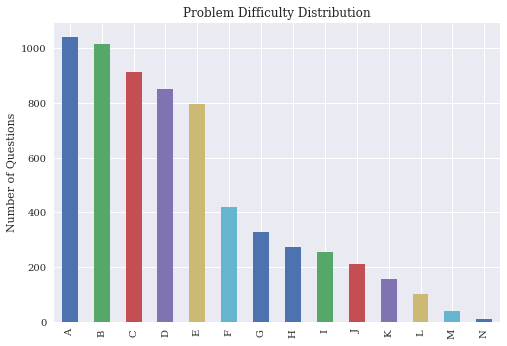

In [0]:
fig = problems_df['level_type'].value_counts().sort_index().plot(kind ='bar', stacked = True, title = "Problem Difficulty Distribution")
fig.set_ylabel('Number of Questions')
plot.show()

####We see that there are more problems which are in the first half of the problem difficulty than the  second half.

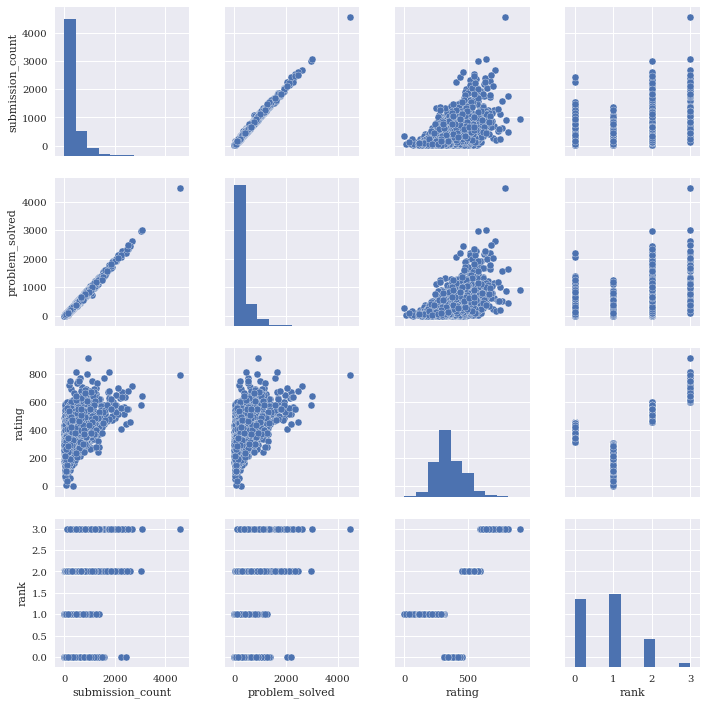

In [0]:
factor = pd.factorize(users_df['rank'])
users_df['rank'] = factor[0]
ax = sns.pairplot(users_df[["submission_count","problem_solved","rating","rank"]])

####So what do the above pair plots tell us?

**1. **Higher number of submissions were made by fewer number of users. 

**2.** Higher count of problems were solved by fewer number of users.

**3.** The rating of users is uniformly spread, and most are with a rating somewhere in the middle.

**4.** Majority users are at an intermediate and beginner level, with very few experts.

**5.** Rating is not directly proportional to the number of problems solved or submissions - this means that difficulty level should have played a part.

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 84)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

ypred_df = pd.DataFrame(y_pred)
ypred_df.index = y_test.index
ypred_df.columns=['1','2','3','4','5','6']

predicted_attempt = ypred_df.idxmax(axis=1)
given_attempt = y_test.idxmax(axis=1)

# Making the Confusion Matrix
print(pd.crosstab(given_attempt, predicted_attempt, rownames=['Actual Attempt Range'], colnames=['Predicted Attempt Range']))

accuracy = accuracy_score(y_test, ypred_df)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

rmse = np.sqrt(mean_squared_error(y_test, ypred_df))
print("RMSE: %f" % (rmse))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Predicted Attempt Range      1     2    3   4   5   6
Actual Attempt Range                                 
1                        16748  3572  341  85  17  26
2                         9215  2323  228  49  21  21
3                         2685   657   81  14   6   8
4                         1069   249   28   3   1   7
5                          470   120   19   0   4   3
6                          586   128   26   8   1   5
Accuracy: 37.44%
RMSE: 0.403627


We have achieved an accuracy of 37% and the Root Mean Square Error is 0.400. Next we will apply the gradient boosting algorithm.

In [0]:
# attempting xgboost algorithm

X_train, X_test, y_train, y_test = train_test_split( X, y_xgb, test_size=0.25, random_state=1)

eval_set = [(X_train,y_train),(X_test,y_test)]
xgb_class = xgb.XGBClassifier(max_depth='10',n_estimators=100, gamma=0, objective='multi:softmax')
xgb_class.fit(X_train,y_train,eval_set=eval_set,verbose=1,eval_metric=['mlogloss'])
print(xgb_class)

preds = xgb_class.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(given_attempt, preds, rownames=['Actual Attempt Range'], colnames=['Predicted Attempt Range']))

y1 = pd.get_dummies(y_test)
y2 = pd.get_dummies(preds)

accuracy = accuracy_score(y1, y2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

rmse = np.sqrt(mean_squared_error(y1, y2))
print("RMSE: %f" % (rmse))

[0]	validation_0-mlogloss:1.70076	validation_1-mlogloss:1.70575
[1]	validation_0-mlogloss:1.62566	validation_1-mlogloss:1.63501
[2]	validation_0-mlogloss:1.56158	validation_1-mlogloss:1.5751
[3]	validation_0-mlogloss:1.50625	validation_1-mlogloss:1.52411
[4]	validation_0-mlogloss:1.45853	validation_1-mlogloss:1.48017
[5]	validation_0-mlogloss:1.41644	validation_1-mlogloss:1.44197
[6]	validation_0-mlogloss:1.37913	validation_1-mlogloss:1.40817
[7]	validation_0-mlogloss:1.34608	validation_1-mlogloss:1.37877
[8]	validation_0-mlogloss:1.31664	validation_1-mlogloss:1.35281
[9]	validation_0-mlogloss:1.28965	validation_1-mlogloss:1.32926
[10]	validation_0-mlogloss:1.26583	validation_1-mlogloss:1.30841
[11]	validation_0-mlogloss:1.24399	validation_1-mlogloss:1.28973
[12]	validation_0-mlogloss:1.22396	validation_1-mlogloss:1.27276
[13]	validation_0-mlogloss:1.20595	validation_1-mlogloss:1.25798
[14]	validation_0-mlogloss:1.18922	validation_1-mlogloss:1.24447
[15]	validation_0-mlogloss:1.17389	v

We have achieved an accuracy of 54% and the Root Mean Square Error is 0.388. The xgboost algorithm has not given a substantially improved model. We will continue to fine tune the parameters and increase the efficiency of the model. Stay tuned!